# Assessing Model Results

This notebook serves as a demo for an initial assessment of Mike's Calfornia Current regional model. You can follow and/or adapt this notebook based on your configuration if you are using a regional domain.

First, import packages to re-create and visualize the model fields here:

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import moviepy.video.io.ImageSequenceClip

Next, define the location of the run directory for the model. This is the directory that holds all of the output from the model.

In [1]:
# define the input directory
run_dir = 'C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags'

Then, re-create the model grid

In [17]:




delX     = 1/12
delY     = 1/16
xgOrigin = -135
ygOrigin = 29


n_rows = 40
n_cols = 90


xc = xgOrigin + delX/2 + delX * np.arange(n_cols)
yc = ygOrigin + delY/2 + delY * np.arange(n_rows)

XC, YC = np.meshgrid(xc, yc)

print("XC,YC shapes:", XC.shape, YC.shape)

XC,YC shapes: (40, 90) (40, 90)


## Plot a model field at one timestep
A good first assessment of a model is to plot some of the output fields. Here, I'll choose one of the surface temperature fields. I'll first read in the field, and then I'll plot it

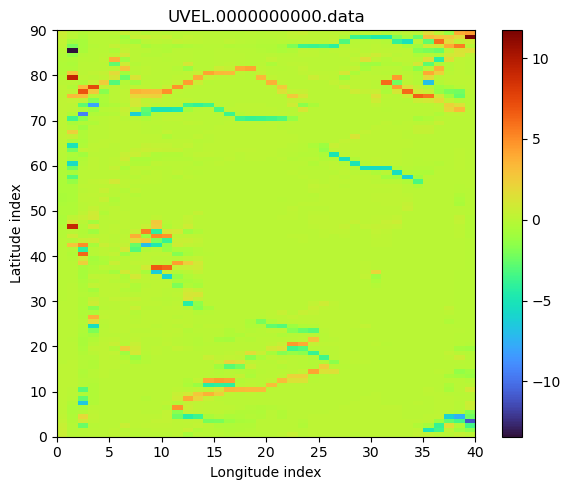

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags/UVEL/UVEL.0000000002.data"

dims = (90, 40, 15)

flat = np.fromfile(file_path, dtype=">f4")
arr3 = flat.reshape(dims, order="F").transpose(2, 0, 1)

# Plotting
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(arr3[0, :, :], shading="auto", cmap="turbo")
plt.title("UVEL.0000000000.data")
plt.xlabel("Longitude index")
plt.ylabel("Latitude index")
plt.colorbar(pcm, orientation="vertical")
plt.tight_layout()
plt.show()


Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000000.data ...
  Skipped permutation (90, 40, 15): cannot reshape array of size 3600 into shape (90,40,15)
  Skipped permutation (90, 15, 40): cannot reshape array of size 3600 into shape (90,15,40)
Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000001.data ...
  Skipped permutation (90, 40, 15): cannot reshape array of size 3600 into shape (90,40,15)
  Skipped permutation (90, 15, 40): cannot reshape array of size 3600 into shape (90,15,40)
Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000002.data ...
  Skipped permutation (90, 40, 15): cannot reshape array of size 3600 into shape (90,40,15)
  Skipped permutation (90, 15, 40): cannot reshape array of size 3600 into shape (90,15,40)
Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diag

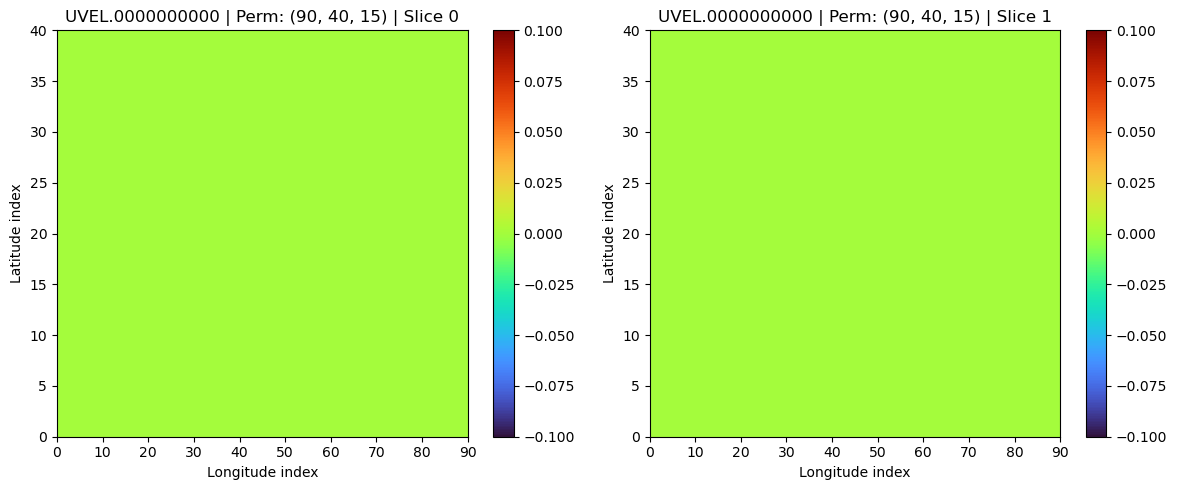

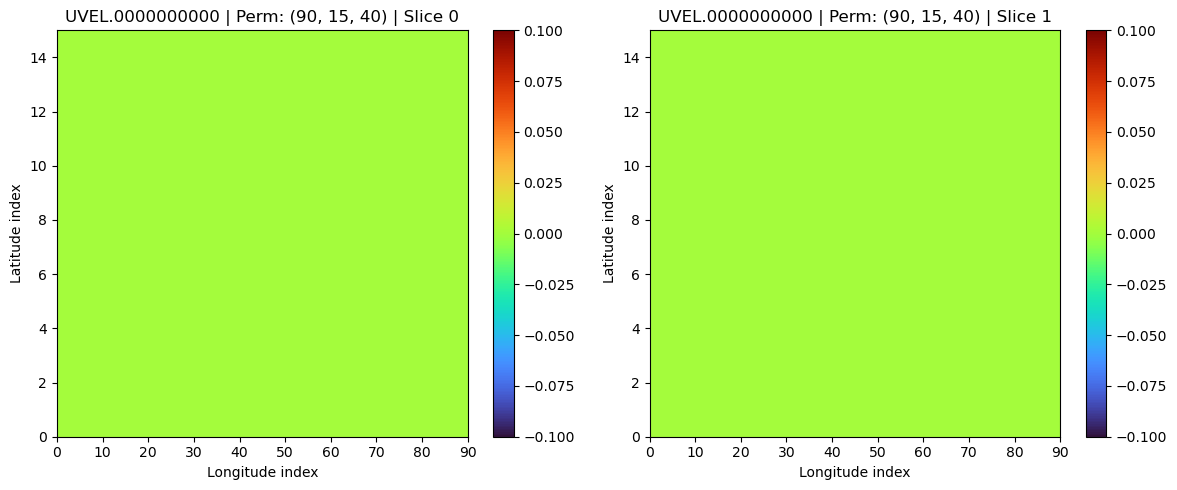

Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000001.data ...


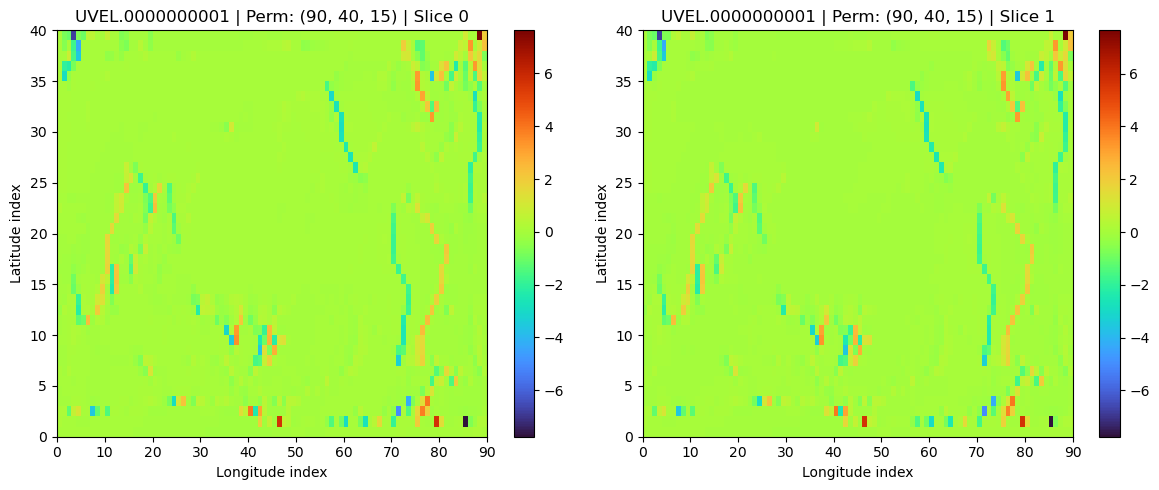

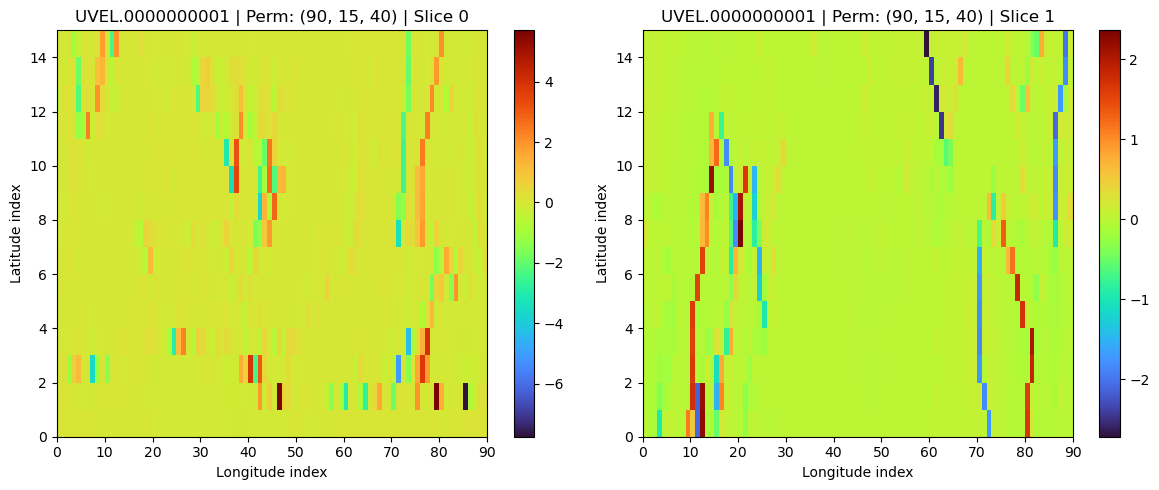

Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000002.data ...


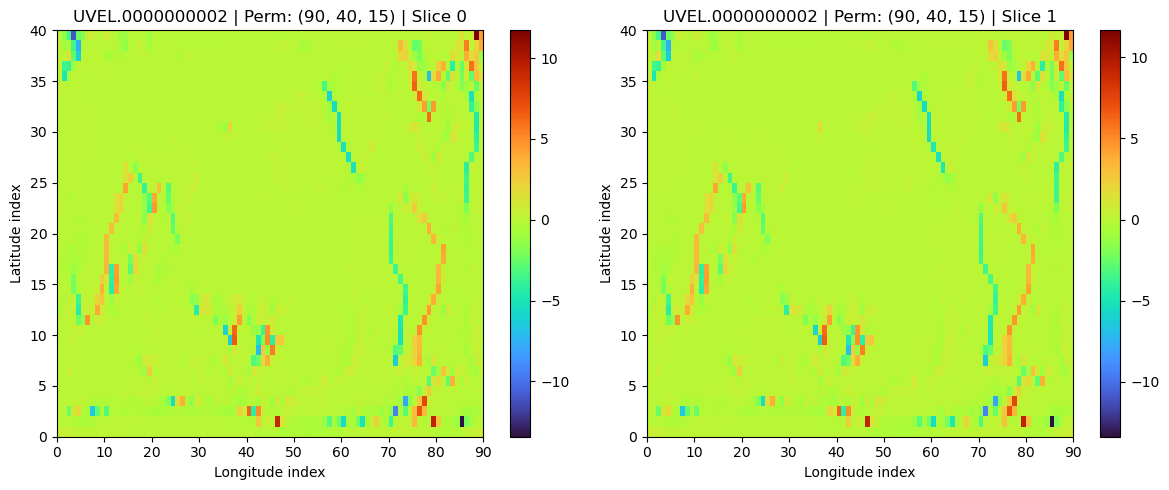

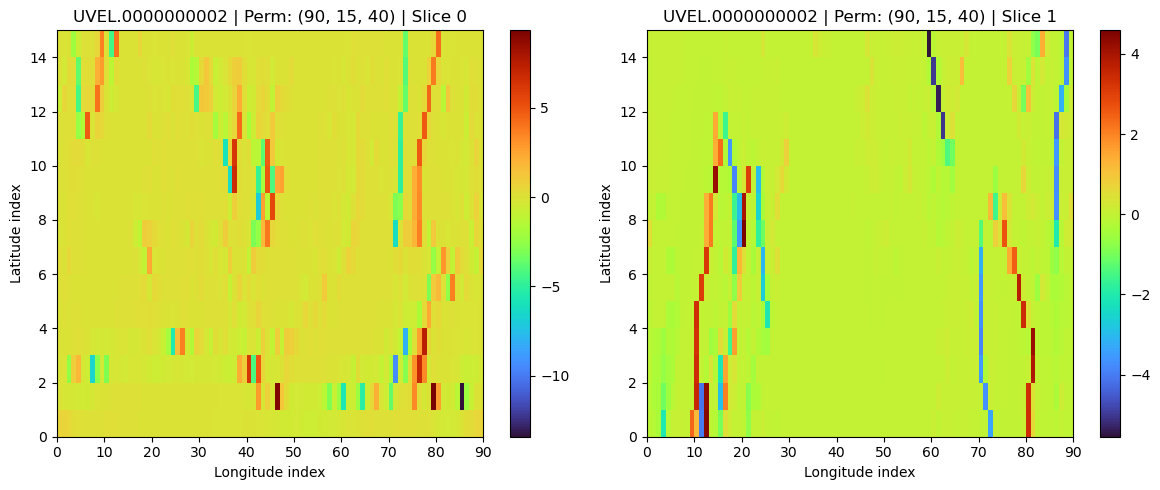

Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000000.data ...


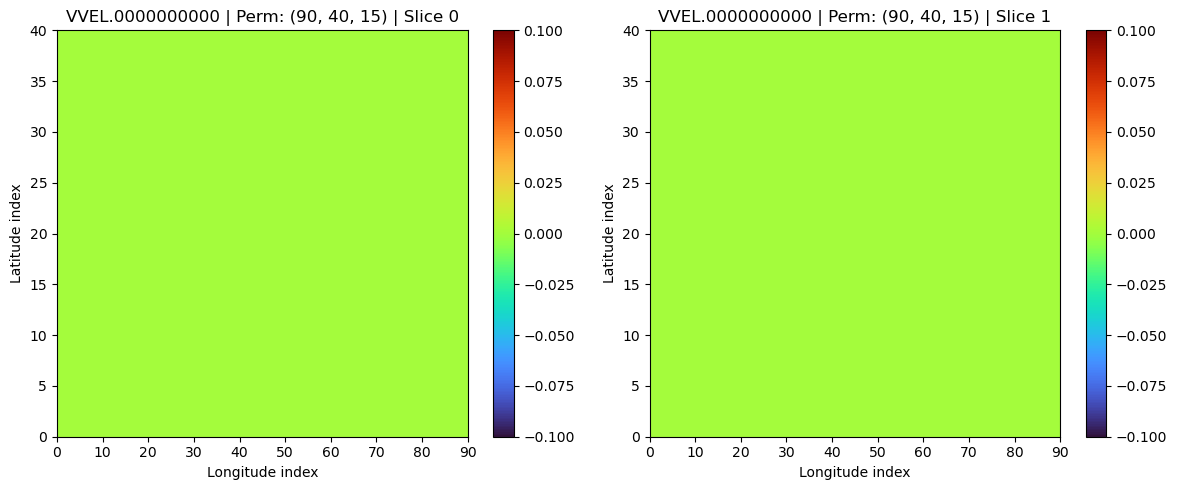

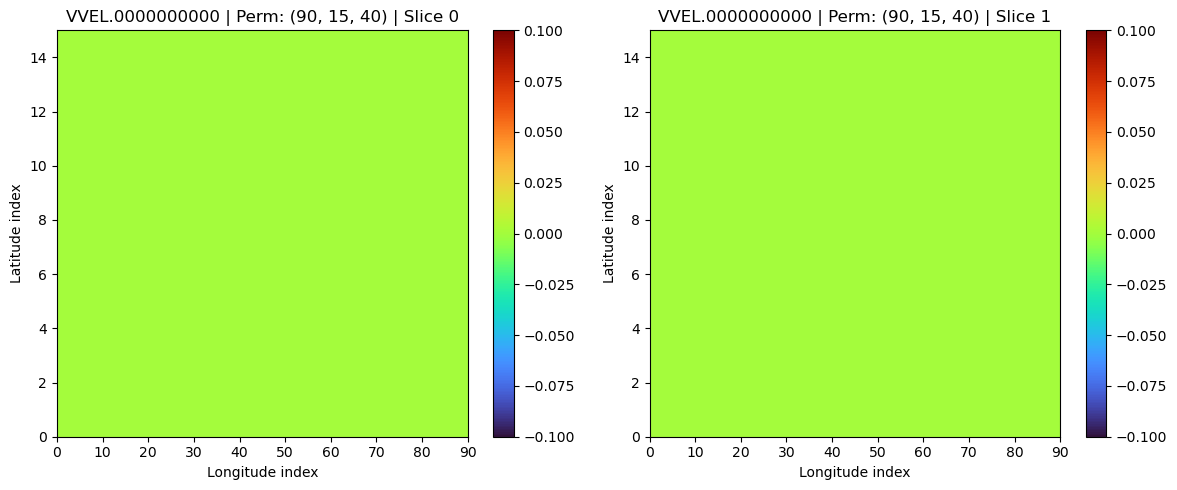

Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000001.data ...


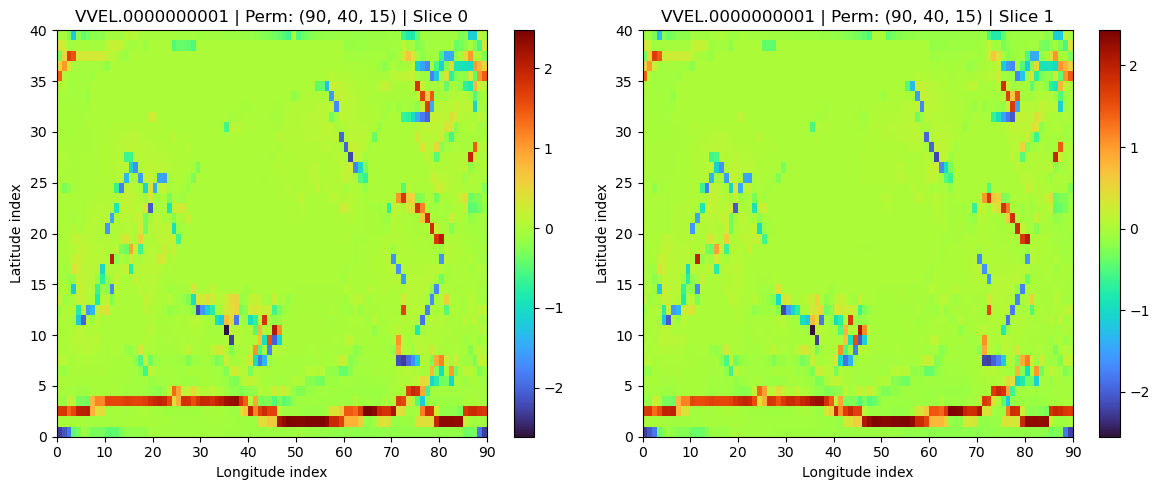

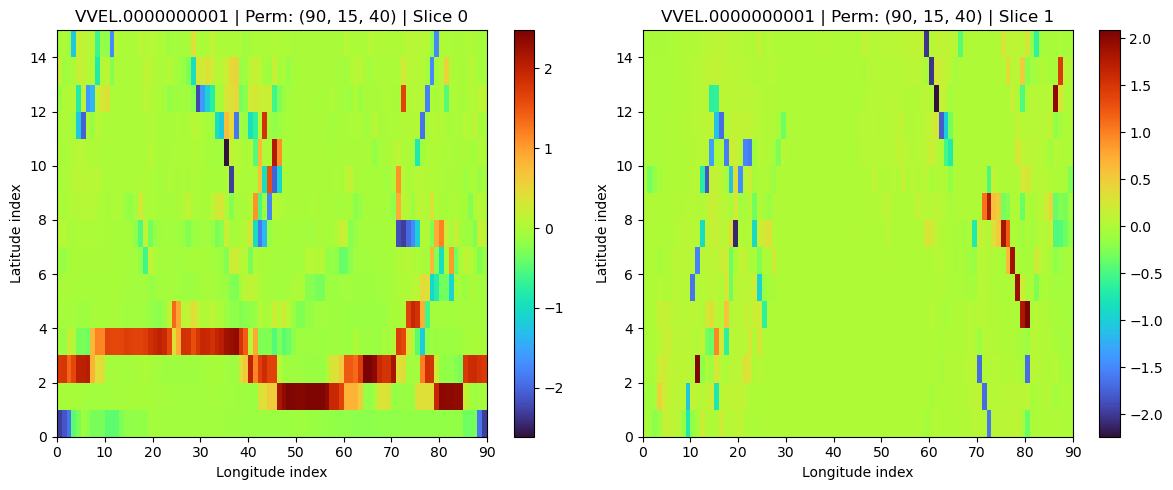

Processing C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000002.data ...


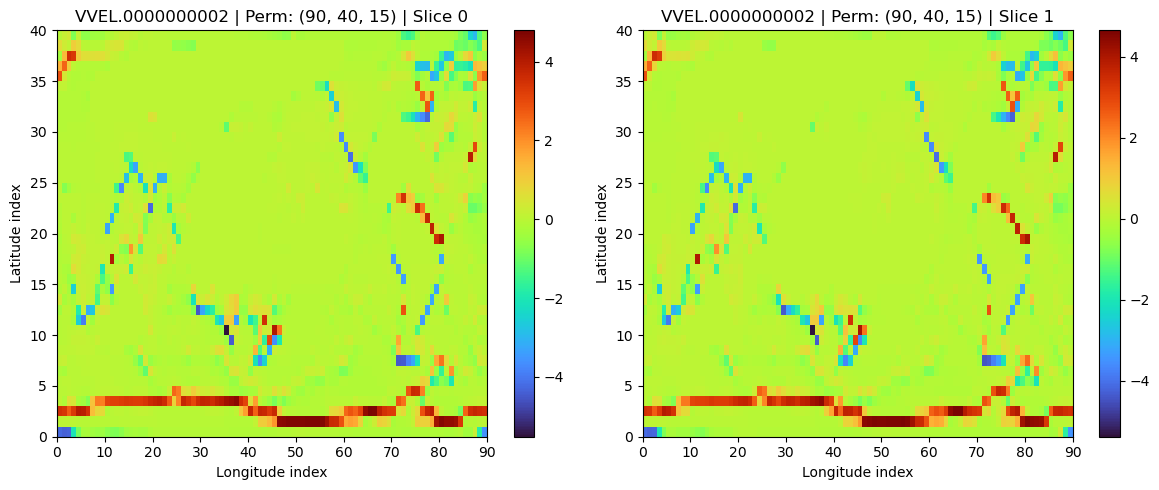

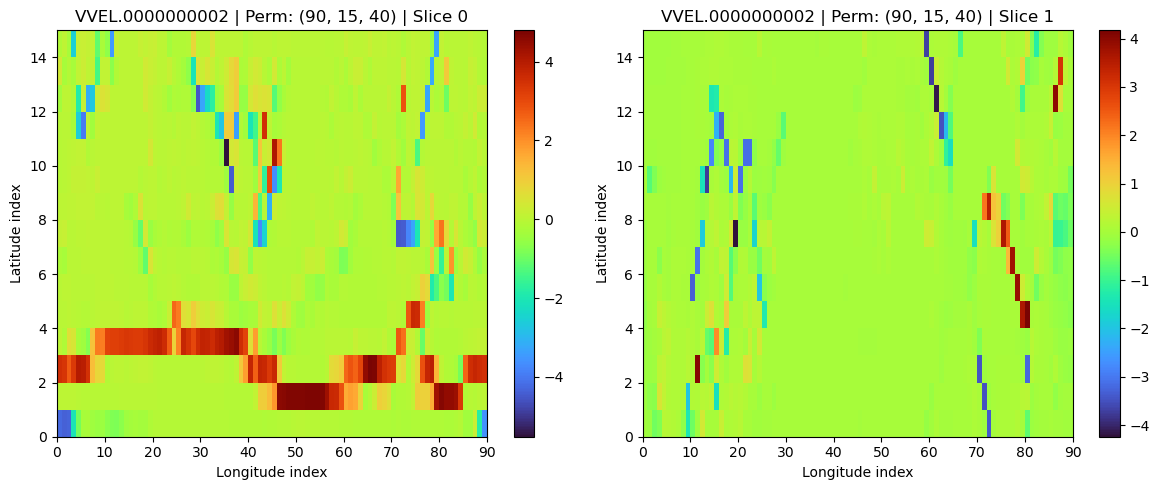

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Fields and file indices
fields = ["ETAN", "UVEL", "VVEL"]
file_indices = [0, 1, 2]

# Dimensions and permutations to test
dims = (90, 40, 15)
perms_to_try = list(permutations(dims))[:2]  # Try first 2 permutations for brevity
slices_to_show = 2  # How many slices per permutation to show

# Base directory
base_dir = r"C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags"

for field in fields:
    for idx in file_indices:
        file_path = os.path.join(base_dir, field, f"{field}.{idx:010d}.data")
        print(f"Processing {file_path} ...")
        
        try:
            flat = np.fromfile(file_path, dtype=">f4")
        except Exception as e:
            print(f"  Failed to load file: {e}")
            continue

        for perm in perms_to_try:
            try:
                reshaped = flat.reshape(perm, order="F")
                arr = reshaped.transpose(2, 1, 0)  # Always [Z, Y, X] convention

                fig, axes = plt.subplots(1, slices_to_show, figsize=(6 * slices_to_show, 5))
                axes = np.atleast_1d(axes)

                for s in range(slices_to_show):
                    pcm = axes[s].pcolormesh(arr[s, :, :], shading="auto", cmap="turbo")
                    axes[s].set_title(f"{field}.{idx:010d} | Perm: {perm} | Slice {s}")
                    axes[s].set_xlabel("Longitude index")
                    axes[s].set_ylabel("Latitude index")
                    fig.colorbar(pcm, ax=axes[s], orientation="vertical")

                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"  Skipped permutation {perm}: {e}")


## Make a timeseries
After plotting a few fields, next we can see how the model is evolving through time. For this example, I'll choose a point in the domain near the coast and I'll plot that on a map to ensure it's in the right location:

NameError: name 'grid' is not defined

When I'm happy with the location of the point, I'll loop through all of the output files to generate a timeseries:

Finally, I'll plot the timeseries:

## Make a movie
The timeseries looks pretty good - let's take a look at how our model is evolving through time by making a movie. First, let's make and test a function to make the panels for our movie

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

base_dir = r"C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags"
fields = ["ETAN", "UVEL", "VVEL"]
dims = (90, 40, 15)
perms_to_try = list(permutations(dims))[:9]  
n_timesteps = 10  
frame_rate = 2  
output_dir = "frames"

os.makedirs(output_dir, exist_ok=True)

for field in fields:
    for perm in perms_to_try:
        perm_name = f"{perm[0]}x{perm[1]}x{perm[2]}"
        frames = []

        for t in range(n_timesteps):
            file_path = os.path.join(base_dir, field, f"{field}.{t:010d}.data")

            if not os.path.isfile(file_path):
                print(f"Missing: {file_path}")
                continue

            try:
                flat = np.fromfile(file_path, dtype=">f4")
                reshaped = flat.reshape(perm, order="F")
                arr = reshaped.transpose(2, 1, 0)  

                fig, ax = plt.subplots(figsize=(6, 5))
                pcm = ax.pcolormesh(arr[0, :, :], cmap="turbo", shading="auto")
                ax.set_title(f"{field} | {perm_name} | t={t}")
                ax.set_xlabel("Longitude index")
                ax.set_ylabel("Latitude index")
                plt.colorbar(pcm, ax=ax, orientation="vertical")
                plt.tight_layout()

                frame_path = os.path.join(output_dir, f"{field}_{perm_name}_{t:03d}.png")
                plt.savefig(frame_path)
                plt.close(fig)

                frames.append(frame_path)

            except Exception as e:
                print(f"Failed {field} {perm} t={t}: {e}")

        if frames:
            output_movie = f"{field}_{perm_name}.mp4"
            clip = ImageSequenceClip(frames, fps=frame_rate)
            clip.write_videofile(output_movie, codec="libx264")
            print(f"Saved movie: {output_movie}")


Failed ETAN (90, 40, 15) t=0: cannot reshape array of size 3600 into shape (90,40,15)
Failed ETAN (90, 40, 15) t=1: cannot reshape array of size 3600 into shape (90,40,15)
Failed ETAN (90, 40, 15) t=2: cannot reshape array of size 3600 into shape (90,40,15)
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\ETAN\ETAN.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring

Moviepy - Done !
Moviepy - video ready UVEL_90x40x15.mp4
Saved movie: UVEL_90x40x15.mp4
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000009.data
Moviepy - Building video UVEL_90x15x40.mp4.
Moviepy - Writing video UVEL_90x15x40.mp4



Moviepy - Done !
Moviepy - video ready UVEL_90x15x40.mp4
Saved movie: UVEL_90x15x40.mp4
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000009.data
Moviepy - Building video UVEL_40x90x15.mp4.
Moviepy - Writing video UVEL_40x90x15.mp4



Moviepy - Done !
Moviepy - video ready UVEL_40x90x15.mp4
Saved movie: UVEL_40x90x15.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000009.data
Moviepy - Building video UVEL_40x15x90.mp4.
Moviepy - Writing video UVEL_40x15x90.mp4



Moviepy - Done !
Moviepy - video ready UVEL_40x15x90.mp4
Saved movie: UVEL_40x15x90.mp4
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000009.data
Moviepy - Building video UVEL_15x90x40.mp4.
Moviepy - Writing video UVEL_15x90x40.mp4



Moviepy - Done !
Moviepy - video ready UVEL_15x90x40.mp4
Saved movie: UVEL_15x90x40.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\UVEL\UVEL.0000000009.data
Moviepy - Building video UVEL_15x40x90.mp4.
Moviepy - Writing video UVEL_15x40x90.mp4



Moviepy - Done !
Moviepy - video ready UVEL_15x40x90.mp4
Saved movie: UVEL_15x40x90.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_90x40x15.mp4.
Moviepy - Writing video VVEL_90x40x15.mp4



Moviepy - Done !
Moviepy - video ready VVEL_90x40x15.mp4
Saved movie: VVEL_90x40x15.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_90x15x40.mp4.
Moviepy - Writing video VVEL_90x15x40.mp4



Moviepy - Done !
Moviepy - video ready VVEL_90x15x40.mp4
Saved movie: VVEL_90x15x40.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_40x90x15.mp4.
Moviepy - Writing video VVEL_40x90x15.mp4



Moviepy - Done !
Moviepy - video ready VVEL_40x90x15.mp4
Saved movie: VVEL_40x90x15.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_40x15x90.mp4.
Moviepy - Writing video VVEL_40x15x90.mp4



Moviepy - Done !
Moviepy - video ready VVEL_40x15x90.mp4
Saved movie: VVEL_40x15x90.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_15x90x40.mp4.
Moviepy - Writing video VVEL_15x90x40.mp4



Moviepy - Done !
Moviepy - video ready VVEL_15x90x40.mp4
Saved movie: VVEL_15x90x40.mp4


Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000003.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000004.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000005.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000006.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000007.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000008.data
Missing: C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging/run/diags\VVEL\VVEL.0000000009.data
Moviepy - Building video VVEL_15x40x90.mp4.
Moviepy - Writing video VVEL_15x40x90.mp4



Moviepy - Done !
Moviepy - video ready VVEL_15x40x90.mp4
Saved movie: VVEL_15x40x90.mp4


When we're happy with the plotting function, we can use it to make the panels:

This is just a first analysis with my first model run. Next, I will wotk to run my next model experiment and analyze the comparison.